### Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#Sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

#other
import concurrent.futures
import time
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Plotly 
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#spaCy
import spacy
nlp = spacy.load("fr_core_news_lg")
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French
import string
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

In [2]:
data_np_nostop=np.load('../../data/data_np_nostop.npy', allow_pickle=True)

### Extract Vectors

In [17]:
vectors=[]
for i in range(len(data_np_nostop)//10):
    doc=nlp(data_np_nostop[i])
    vectors_doc=[]
    for token in doc:
        vectors_doc.append(token.vector)
    vectors.append(np.array(vectors_doc))

In [18]:
vectors=np.array(vectors)

In [22]:
vectors[2].shape

(43, 300)

In [30]:
len(vectors_clean)

25

478
3.490894


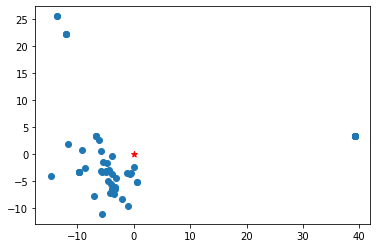

In [90]:
import random 
rand= random.randint(1, len(data_np_nostop)//10)
print(rand)
print(np.var(vectors[rand]))

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(vectors[rand])
vectors_pca=pca.transform(vectors[rand]).transpose()
x,y = np.mean(vectors_pca[0]), np.mean(vectors_pca[1])

plt.figure(0)
plt.scatter(vectors_pca[0], vectors_pca[1])


from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, contamination=0.4).fit(vectors[rand])
truth=clf.predict(vectors[rand])

vectors_clean=[]
for i in range(len(vectors[rand])):
    if truth[i]==1:
               vectors_clean.append(vectors[rand][i])


from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(vectors_clean)
vectors_pca_clean=pca.transform(vectors_clean).transpose()
xc,yc = np.mean(vectors_pca_clean[0]), np.mean(vectors_pca_clean[1])
#plt.figure(1)
#plt.scatter(vectors_pca_clean[0], vectors_pca_clean[1])
#plt.scatter(x, y, marker='D', color='green')
plt.scatter(xc, yc, marker='*', color='red')

